In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spain_df = pd.read_csv('results/spain_clean.csv')
season_results_df = pd.read_csv('results/season_standings.csv')
season_results_df

,Season,Team,Points,Place,GS,GA,GD,Wins,Losses,Ties
0,1928,FC Barcelona,36,1,37,23,14,11,4,3
1,1928,Real Madrid,34,2,40,27,13,11,6,1
2,1928,Real Sociedad,28,3,46,41,5,8,6,4
3,1928,Athletic Bilbao,28,4,43,33,10,8,6,4
4,1928,Arenas de Getxo,27,5,32,39,-7,8,7,3
...,...,...,...,...,...,...,...,...,...,...
1557,2021,Cadiz CF,39,16,35,51,-16,8,15,15
1558,2021,Getafe CF,39,17,33,41,-8,8,15,15
1559,2021,Granada CF,38,18,44,61,-17,8,16,14
1560,2021,Levante UD,35,19,51,76,-25,8,19,11


In [46]:
#gets records for all games with home team as Barcelona
barca_home_df = spain_df[spain_df['home'] == "FC Barcelona"]
#gets records in barcelona home games where real madrid is visiting.
barca_madrid_df = barca_home_df[barca_home_df['visitor'] == 'Real Madrid']
# gets records for all games with home team as Real Madrid
madrid_home_df = spain_df[spain_df['home'] == 'Real Madrid']
#gets records in Real Madrid home games where Barcelona is the visiting team
madrid_barca_df = madrid_home_df[madrid_home_df['visitor'] == 'FC Barcelona']

#Combines home-away records for each team into a singel dataframe and sorts by date.
head_to_head_list = [barca_madrid_df, madrid_barca_df] 
head_to_head_df = pd.concat(head_to_head_list).sort_values( by= 'Date')
print(f'@Barcelona: {barca_madrid_df.shape[0]}, @Madrid: {madrid_barca_df.shape[0]},Total Games: {head_to_head_df.shape[0]}')
head_to_head_df

@Barcelona: 92, @Madrid: 92,Total Games: 184


,Date,Season,home,visitor,score,hgoal,vgoal,hpoint,vpoint
9,1929-02-17,1928,FC Barcelona,Real Madrid,1-2,1,2,0,3
55,1929-05-09,1928,Real Madrid,FC Barcelona,0-1,0,1,0,3
131,1930-01-26,1929,FC Barcelona,Real Madrid,1-4,1,4,0,3
178,1930-03-30,1929,Real Madrid,FC Barcelona,5-1,5,1,3,0
224,1931-02-01,1930,Real Madrid,FC Barcelona,0-0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
25311,2020-03-01,2019,Real Madrid,FC Barcelona,2-0,2,0,3,0
25492,2020-10-24,2020,FC Barcelona,Real Madrid,1-3,1,3,0,3
25726,2021-04-10,2020,Real Madrid,FC Barcelona,2-1,2,1,3,0
25908,2021-10-24,2021,FC Barcelona,Real Madrid,1-2,1,2,0,3


In [40]:
head_to_head_df['score'].value_counts().tail(15)
highest_score = head_to_head_df[head_to_head_df['score'] == '8-2']
highest_score

,Date,Season,home,visitor,score,hgoal,vgoal,hpoint,vpoint
594,1935-02-03,1934,Real Madrid,FC Barcelona,8-2,8,2,3,0


In [47]:
zero_zero_ties = head_to_head_df[head_to_head_df['score'] == '0-0']
#all_ties = head_to_head_df[head_to_head_df['hgoal'] == head_to_head_df['vgoal']]
all_ties = head_to_head_df[head_to_head_df['hpoint'] == 1]

,Wins,Losses,Ties
FC Barcelona,73,76,35
Real Madrid,76,73,35


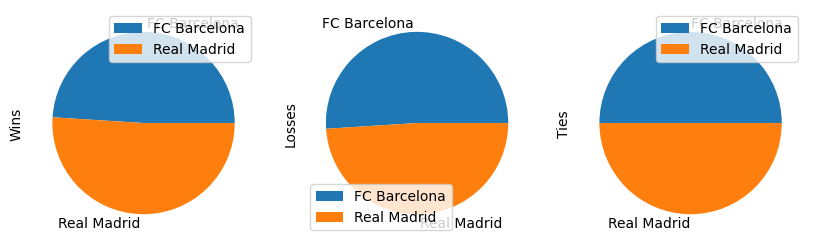

In [27]:
barca_home_df = head_to_head_df[head_to_head_df['home'] == 'FC Barcelona']
barca_home_wins_df = barca_home_df[barca_home_df['hpoint'] == 3]
barca_home_losses_df = barca_home_df[barca_home_df['hpoint'] == 0]
barca_home_ties_df = barca_home_df[barca_home_df['hpoint'] == 1]
barca_home_wlt_dict = {
    'Wins': barca_home_wins_df.shape[0], 
    'Losses': barca_home_losses_df.shape[0], 
    'Ties': barca_home_ties_df.shape[0]
}


madrid_home_df = head_to_head_df[head_to_head_df['home'] == 'Real Madrid']
madrid_home_wins_df = madrid_home_df[madrid_home_df['hpoint'] == 3]
madrid_home_losses_df = madrid_home_df[madrid_home_df['hpoint'] == 0]
madrid_home_ties_df = madrid_home_df[madrid_home_df['hpoint'] == 1]
madrid_home_wlt_dict = { 
    'Wins': madrid_home_wins_df.shape[0], 
    'Losses': madrid_home_losses_df.shape[0], 
    'Ties': madrid_home_ties_df.shape[0]
    }

barca_wlt_dict = { 
    'Wins': barca_home_wins_df.shape[0] + madrid_home_losses_df.shape[0], 
    'Losses': barca_home_losses_df.shape[0] + madrid_home_wins_df.shape[0], 
    'Ties': barca_home_ties_df.shape[0] + madrid_home_ties_df.shape[0]
    }

madrid_wlt_dict = { 
    'Wins': madrid_home_wins_df.shape[0] + barca_home_losses_df.shape[0], 
    'Losses': madrid_home_losses_df.shape[0] + barca_home_wins_df.shape[0], 
    'Ties': madrid_home_ties_df.shape[0] + barca_home_ties_df.shape[0]
    }


barca_wlt_df = pd.DataFrame(barca_wlt_dict, index=['FC Barcelona'])

madrid_wlt_df = pd.DataFrame(madrid_wlt_dict, index=['Real Madrid'])

home_wlt_df = pd.concat([barca_wlt_df, madrid_wlt_df])
home_wlt_df.plot.pie(subplots=True, figsize=(10, 5))
home_wlt_df





In [71]:
last_5_games = head_to_head_df.tail(5)
last_5_games



,Date,Season,home,visitor,score,hgoal,vgoal,hpoint,vpoint
25311,2020-03-01,2019,Real Madrid,FC Barcelona,2-0,2,0,3,0
25492,2020-10-24,2020,FC Barcelona,Real Madrid,1-3,1,3,0,3
25726,2021-04-10,2020,Real Madrid,FC Barcelona,2-1,2,1,3,0
25908,2021-10-24,2021,FC Barcelona,Real Madrid,1-2,1,2,0,3
26100,2022-03-20,2021,Real Madrid,FC Barcelona,0-4,0,4,0,3


In [68]:

barca_goals_scored = barca_madrid_df['hgoal'].sum() + madrid_barca_df['vgoal'].sum()
madrid_goals_scored = madrid_barca_df['hgoal'].sum() + barca_madrid_df['vgoal'].sum()
print(f'Total Goals Scored- Barcelona: {barca_goals_scored}, Real Madrid: {madrid_goals_scored}')

barca_goals_allowed = barca_madrid_df['vgoal'].sum() + madrid_barca_df['hgoal'].sum()
madrid_goals_allowed = madrid_barca_df['vgoal'].sum() + barca_madrid_df['hgoal'].sum()
print(f'Total Goals Allowed- Barcelona: {barca_goals_allowed}, Real Madrid: {madrid_goals_allowed}')
madrid_barca_df['hgoal'].sum()




Total Goals Scored- Barcelona: 295, Real Madrid: 295
Total Goals Allowed- Barcelona: 295, Real Madrid: 295


185

In [152]:
barca_season_results = season_results_df[season_results_df['Team'] == 'FC Barcelona']
madrid_season_results= season_results_df[season_results_df['Team'] == 'Real Madrid']
combined_season_results = pd.concat([barca_season_results, madrid_season_results]).sort_values(by='Season')
combined_season_results



,Season,Team,Points,Place,GS,GA,GD,Wins,Losses,Ties
0,1928,FC Barcelona,36,1,37,23,14,11,4,3
1,1928,Real Madrid,34,2,40,27,13,11,6,1
14,1929,Real Madrid,24,5,45,42,3,7,8,3
11,1929,FC Barcelona,34,2,46,36,10,11,6,1
23,1930,FC Barcelona,28,4,40,43,-3,7,4,7
...,...,...,...,...,...,...,...,...,...,...
1503,2019,FC Barcelona,82,2,86,38,48,25,6,7
1523,2020,Real Madrid,84,2,67,28,39,25,4,9
1524,2020,FC Barcelona,79,3,85,38,47,24,7,7
1543,2021,FC Barcelona,73,2,68,38,30,21,7,10


<Figure size 640x480 with 0 Axes>

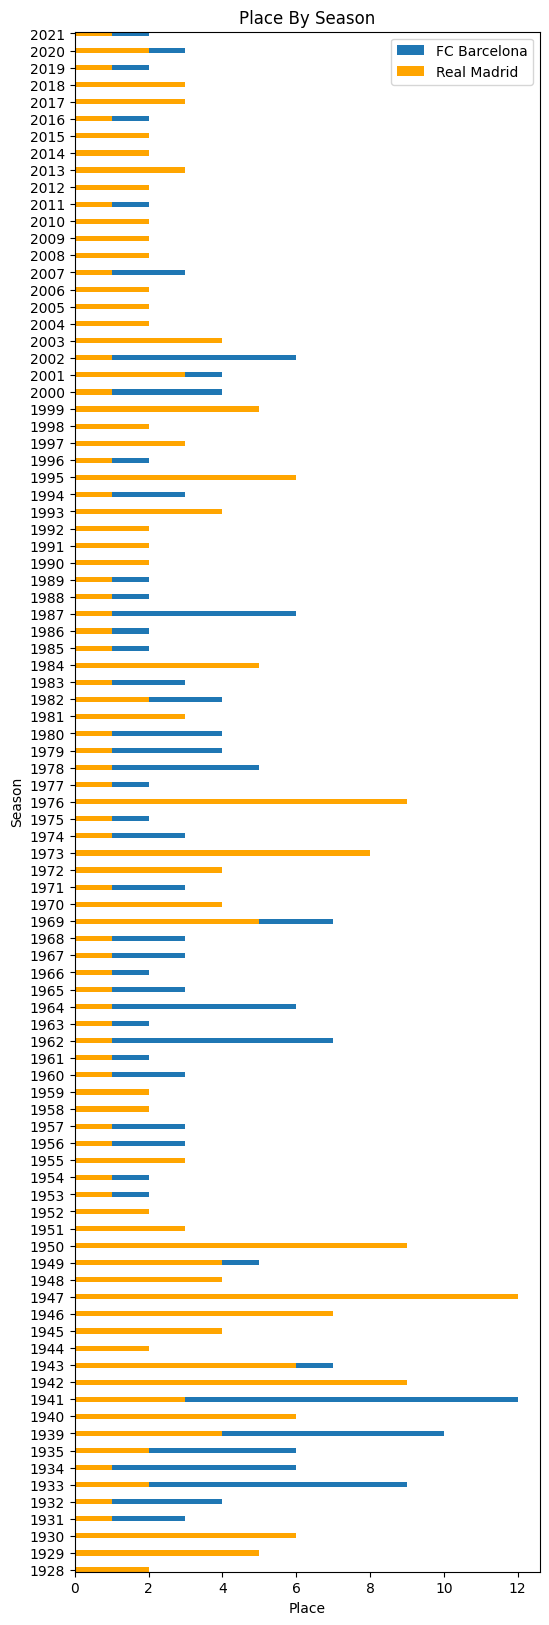

In [247]:


plt.figure()
barca_places = barca_season_results
madrid_places = madrid_season_results

ax = barca_places.plot(kind='barh',figsize=(6,20), y='Place', x='Season', label='FC Barcelona', width=.3, yticks=(np.arange(1928, 2023, step=1)))
madrid_places.plot(ax=ax, kind='barh', stacked=False, y='Place', x='Season', color='orange', label='Real Madrid', width=-.3)
plt.xlabel('Place', fontsize=10)
plt.ylabel('Season', fontsize=10)


plt.legend()
plt.title('Place By Season')
plt.show()
